# Representative Trials (Fig 4)
The last few blocks that generate the final plots can be changed to different E:I ratios by changing the value in `excHidRat`

In [1]:
from analysisUtil import *
import pandas as pd
import random
from scipy import stats
df = pd.read_csv('combinedDataV07.csv')
font = {'fontname':'Arial'}

In [2]:
simTag = 'sparse095_10class_140_t0'

simTagDict = {0.5: {'low':'sparse050_10class_108_t0', 'med':'sparse050_10class_116_t0', 'high':'sparse050_10class_140_t0'},
              0.8: {'low':'sparse080_10class_108_t0', 'med':'sparse080_10class_116_t0', 'high':'sparse080_10class_140_t0'},
              0.95: {'low':'sparse095_10class_108_t0', 'med':'sparse095_10class_116_t0', 'high':'sparse095_10class_140_t0'}
}

# colorExcDefs = {0.5:'#F1C40F',
#             0.8:'#ED7D31',
#             0.95:'#A93226',
#             1.0:'#6A1B9A'}
colorExcDefs = {
    0.50: '#BEBBEC',  # light lavender
    0.70: '#BA94D8',  # lavender
    0.75: '#BF72BB',  # rich lavender
    0.80: '#8E4198',  # dark lavender
    0.90: '#442F8E',  # deep lavender
    0.95: '#204B80', # dark purple
    1.00: '#000000'   # Black
}
colorDefs = {
1.00:'#000000',
0.95:'#8D13A3',
0.90:'#7C2ED1',
0.80:'#6E51EA',
0.75:'#727CE8',
0.70:'#91B1E8',
0.50:'#AED5EB'
}
folder = './individual_trials'
dataSet = 'sparse080_10class'

In [3]:
index = None
for i in range(len(df)):
    if df['simTag'].values[i] == simTag:
        index = i

In [4]:
df['simTag'].values[index]

'sparse095_10class_140_t0'

In [5]:
exc = []
inh = []
epoch = []
classRange = []
for e in range(-1,30):
    eAVG = 0
    iAVG = 0
    for c in range(10):
        excName = 'excActAvg_e'+str(e)+'_c'+str(c)
        excVal = df[excName].values[index]
        inhName = 'inhActAvg_e'+str(e)+'_c'+str(c)
        inhVal = df[inhName].values[index]
        exc.append(excVal)
        inh.append(inhVal)
        epoch.append(e)
        classRange.append(c)
        eAVG+=excVal
        iAVG+=inhVal
        
    eAVG = eAVG/10
    iAVG = iAVG/10
    exc.append(eAVG)
    inh.append(iAVG)
    epoch.append(e)
    classRange.append(-1)

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

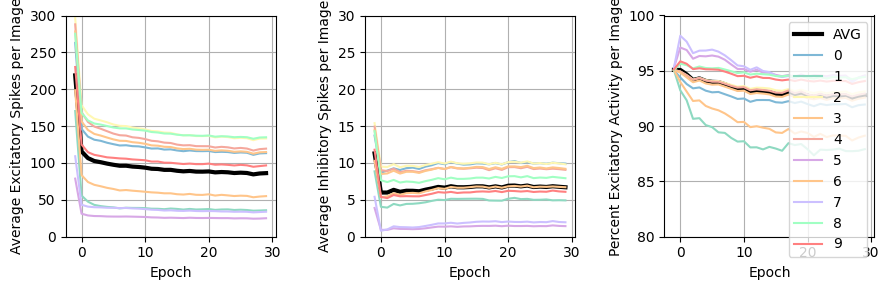

In [6]:
fig, axs = plt.subplots(1, 3, figsize=(9,3))

#colorDefs = ['#AEC6CF','#B5EAD7', '#FFFACD','#FFDAB9', '#F5D0C4',
#            '#E0BBE4','#FFDAB9','#E6E6FA','#BDFCC9','#F08080']

colorDefs = ['#7EB8D6','#8ED9C1','#FFF8B3','#FFC58A','#F5A89D',
            '#D7A8E6','#FFC58A','#CCC0FF','#A1FFC3','#FF8080']

for c in range(-1,10):
    xE = []
    yE = []
    xI = []
    yI = []
    xDiv = []
    yDiv = []
    for e in range(-1,30):
        for i in (range(len(epoch))):
            if epoch[i]!=e: continue
            if classRange[i]!=c: continue
            xE.append(epoch[i])
            yE.append(exc[i])
            xI.append(epoch[i])
            yI.append(inh[i])
            xDiv.append(epoch[i])
            yDiv.append(exc[i]/(exc[i]+inh[i]) * 100)
            
    if c!=-1:
        axs[0].plot(xE, yE, label=str(c), color=colorDefs[c])
        axs[1].plot(xI, yI, label=str(c), color=colorDefs[c])
        axs[2].plot(xDiv, yDiv, label=str(c), color=colorDefs[c])
    else:
        axs[0].plot(xE, yE, label='AVG', linewidth=3.0, color='black')
        axs[1].plot(xI, yI, label='AVG', linewidth=3.0, color='black')
        axs[2].plot(xDiv, yDiv, label='AVG', linewidth=3.0, color='black')
    

axs[2].legend()
axs[0].set_ylim(0,300)
axs[1].set_ylim(0,30)
axs[2].set_ylim(80,100)
axs[0].grid()
axs[1].grid()
axs[2].grid()
axs[0].set_xlabel('Epoch', family='Arial')
axs[1].set_xlabel('Epoch', family='Arial')
axs[2].set_xlabel('Epoch', family='Arial')
axs[0].set_ylabel('Average Excitatory Spikes per Image', family='Arial')
axs[1].set_ylabel('Average Inhibitory Spikes per Image', family='Arial')
axs[2].set_ylabel('Percent Excitatory Activity per Image', family='Arial')
plt.tight_layout()
plt.savefig(folder+'/'+simTag+'V03_SR.svg')

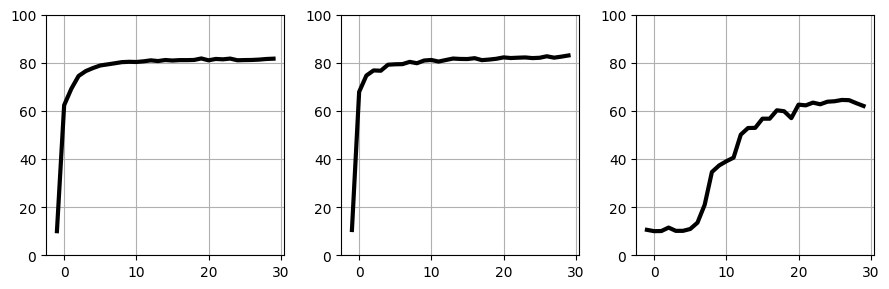

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(9,3))
excHidRat=0.5
for level in ['low', 'med','high']:
    column = 0
    if level=='med': column=1
    if level=='high': column=2
    
    simTag = simTagDict[excHidRat][level]
    for i in range(len(df)):
        if df['simTag'].values[i] == simTag:
            index = i    

    for i in range(len(df)):
        if df['excHidRat'].values[i] != excHidRat: continue
        acc = []
        for e in range(-1,30):
            correct = 0
            total = 0
            for c in range(10):
                TP = df['TP_e'+str(e)+'_c'+str(c)].values[i]
                FN = df['FN_e'+str(e)+'_c'+str(c)].values[i]
                TN = df['TN_e'+str(e)+'_c'+str(c)].values[i]
                FP = df['FP_e'+str(e)+'_c'+str(c)].values[i]
                correct+=TP
            total+=TP+FN+TN+FP
            acc.append((correct/total) *100)
        #axs[column].plot(acc, linewidth=0.5, color='#A0A0A0')
            
    acc = []
    for e in range(-1,30):
        correct = 0
        total = 0
        for c in range(10):
            TP = df['TP_e'+str(e)+'_c'+str(c)].values[index]
            FN = df['FN_e'+str(e)+'_c'+str(c)].values[index]
            TN = df['TN_e'+str(e)+'_c'+str(c)].values[index]
            FP = df['FP_e'+str(e)+'_c'+str(c)].values[index]
            correct+=TP
        total+=TP+FN+TN+FP
        acc.append((correct/total) *100)
    axs[column].plot(range(-1, 30), acc, linewidth=3, color='black') #colorExcDefs[excHidRat])
    axs[column].set_ylim(0,100)
    axs[column].grid()
    axs[column].set_axisbelow(True)
    
plt.tight_layout()
plt.savefig(folder+'/Representative_acc_'+str(int(excHidRat*100))+'V02_SR.svg')

attempting to load:/media/adamlab/My Passport/LIF Analysis Data/FashionMNIST/raw_data/sparse050_10class/obj/sparse050_10class_108_t0_w1_init
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/FashionMNIST/raw_data/sparse050_10class/obj/sparse050_10class_108_t0_w1_e29
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/FashionMNIST/raw_data/sparse050_10class/obj/sparse050_10class_116_t0_w1_init
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/FashionMNIST/raw_data/sparse050_10class/obj/sparse050_10class_116_t0_w1_e29
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/FashionMNIST/raw_data/sparse050_10class/obj/sparse050_10class_140_t0_w1_init
attempting to load:/media/adamlab/My Passport/LIF Analysis Data/FashionMNIST/raw_data/sparse050_10class/obj/sparse050_10class_140_t0_w1_e29


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

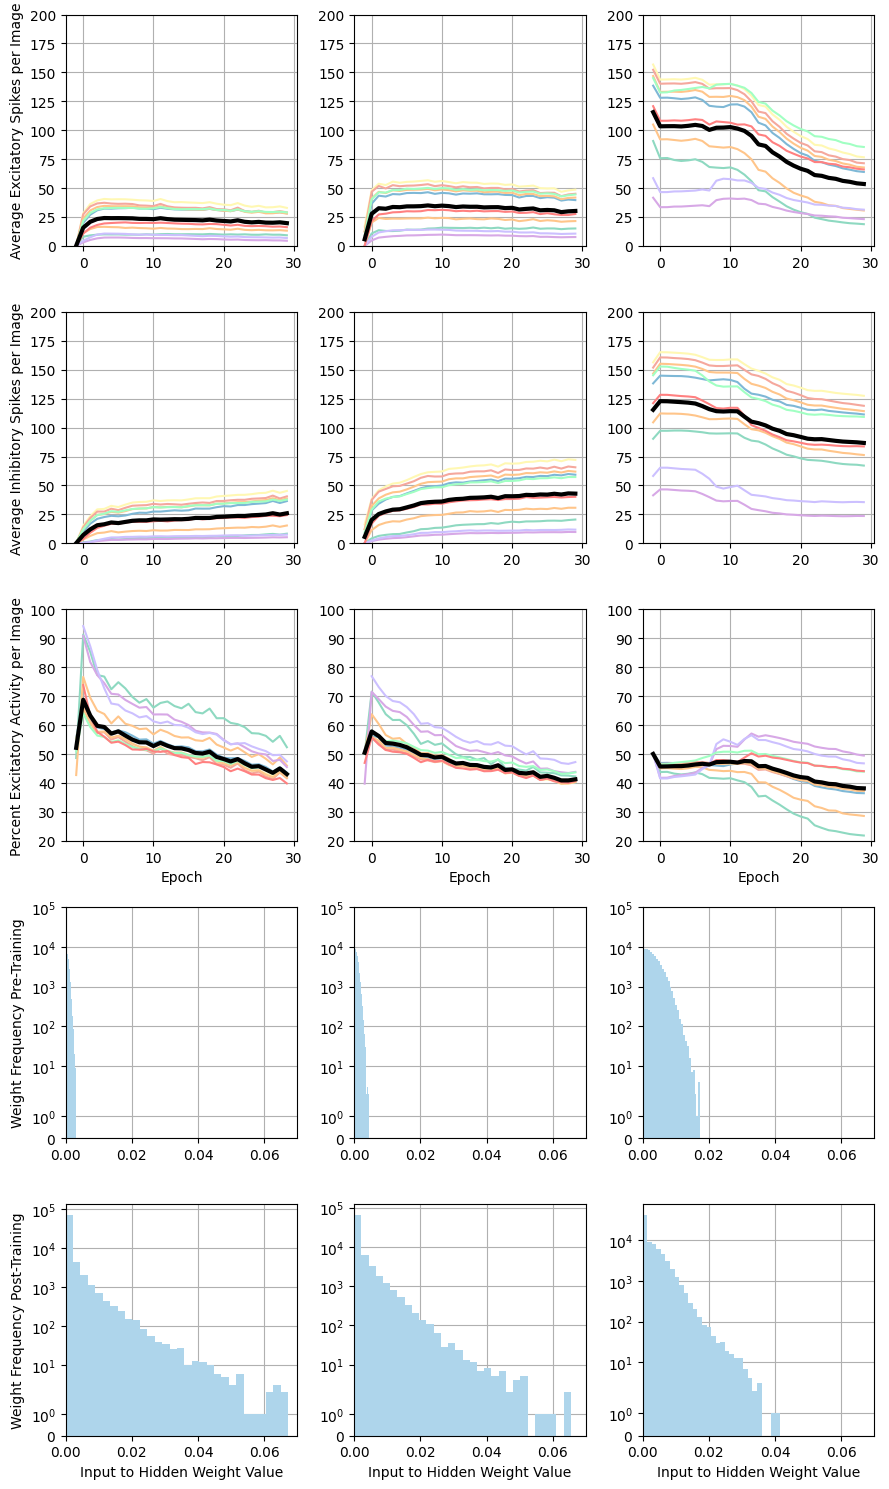

In [8]:
fig, axs = plt.subplots(5, 3, figsize=(9,15))

#colorDefs = ['#AEC6CF','#B5EAD7', '#FFFACD','#FFDAB9', '#F5D0C4',
#            '#E0BBE4','#FFDAB9','#E6E6FA','#BDFCC9','#F08080']

colorDefs = ['#7EB8D6','#8ED9C1','#FFF8B3','#FFC58A','#F5A89D',
            '#D7A8E6','#FFC58A','#CCC0FF','#A1FFC3','#FF8080']

colorExcDefs = {
1.00:'#000000',
 .95:'#8D13A3',
 .90:'#7C2ED1',
 .80:'#6E51EA',
 .75:'#727CE8',
 .70:'#91B1E8',
 .50:'#AED5EB'
}

excHidRat = 0.5

objFolder = '/media/adamlab/My Passport/LIF Analysis Data/FashionMNIST/raw_data/sparse{:03d}_10class/obj'.format(int(excHidRat*100))

for level in ['low', 'med','high']:
    column = 0
    if level=='med': column=1
    if level=='high': column=2
    
    simTag = simTagDict[excHidRat][level]
    for i in range(len(df)):
        if df['simTag'].values[i] == simTag:
            index = i    
    
    exc = []
    inh = []
    epoch = []
    classRange = []
    for e in range(-1,30):
        eAVG = 0
        iAVG = 0
        for c in range(10):
            excName = 'excActAvg_e'+str(e)+'_c'+str(c)
            excVal = df[excName].values[index]
            inhName = 'inhActAvg_e'+str(e)+'_c'+str(c)
            inhVal = df[inhName].values[index]
            exc.append(excVal)
            inh.append(inhVal)
            epoch.append(e)
            classRange.append(c)
            eAVG+=excVal
            iAVG+=inhVal

        eAVG = eAVG/10
        iAVG = iAVG/10
        exc.append(eAVG)
        inh.append(iAVG)
        epoch.append(e)
        classRange.append(10)
    
    
    for c in range(0,11):
        xE = []
        yE = []
        xI = []
        yI = []
        xDiv = []
        yDiv = []
        for e in range(-1,30):
            for i in (range(len(epoch))):
                if epoch[i]!=e: continue
                if classRange[i]!=c: continue
                xE.append(epoch[i])
                yE.append(exc[i])
                xI.append(epoch[i])
                yI.append(inh[i])
                xDiv.append(epoch[i])
                yDiv.append(exc[i]/(exc[i]+inh[i]) * 100)

        if c!=10:
            axs[0][column].plot(xE, yE, label=str(c), color=colorDefs[c])
            axs[1][column].plot(xI, yI, label=str(c), color=colorDefs[c])
            axs[2][column].plot(xDiv, yDiv, label=str(c), color=colorDefs[c])
        else:
            axs[0][column].plot(xE, yE, label='AVG', linewidth=3.0, color='black')
            axs[1][column].plot(xI, yI, label='AVG', linewidth=3.0, color='black')
            axs[2][column].plot(xDiv, yDiv, label='AVG', linewidth=3.0, color='black')


    
    w = getWeightFromUniqueId(simTag+'_w1_init', objFolder=objFolder).detach().numpy()
    axs[3][column].hist(w.flatten(), color=colorExcDefs[excHidRat], bins=30)
    axs[3][column].set_yscale('symlog')
    axs[3][column].set_xlim(0,0.07)
    axs[3][column].set_ylim(0,1e5)
    axs[3][column].grid()
    axs[3][column].set_axisbelow(True)
    
    w = getWeightFromUniqueId(simTag+'_w1_e29', objFolder=objFolder).detach().numpy()
    axs[4][column].hist(w.flatten(), color=colorExcDefs[excHidRat], bins=30)
    axs[4][column].set_yscale('symlog')
    axs[4][column].set_xlim(0,0.07)
    axs[3][column].set_ylim(0,1e5)
    axs[4][column].grid()
    axs[4][column].set_axisbelow(True)
    
#axs[0][2].legend()
for i in range(3):
    if excHidRat==0.5:
        axs[0][i].set_ylim(0,200)
        axs[1][i].set_ylim(0,200)
        axs[2][i].set_ylim(20,100)
    elif excHidRat==0.8:
        axs[0][i].set_ylim(0,250)
        axs[1][i].set_ylim(0,100)
        axs[2][i].set_ylim(20,100)
    elif excHidRat==0.95:
        axs[0][i].set_ylim(0,300)
        axs[1][i].set_ylim(0,30)
        axs[2][i].set_ylim(20,100)
    axs[0][i].grid()
    axs[1][i].grid()
    axs[2][i].grid()
axs[2][0].set_xlabel('Epoch', family='Arial')
axs[2][1].set_xlabel('Epoch', family='Arial')
axs[2][2].set_xlabel('Epoch', family='Arial')
axs[0][0].set_ylabel('Average Excitatory Spikes per Image', family='Arial')
axs[1][0].set_ylabel('Average Inhibitory Spikes per Image', family='Arial')
axs[2][0].set_ylabel('Percent Excitatory Activity per Image', family='Arial')

axs[3][0].set_ylabel('Weight Frequency Pre-Training')
axs[4][0].set_ylabel('Weight Frequency Post-Training')
axs[4][0].set_xlabel('Input to Hidden Weight Value')
axs[4][1].set_xlabel('Input to Hidden Weight Value')
axs[4][2].set_xlabel('Input to Hidden Weight Value')

plt.tight_layout()
plt.savefig(folder+'/Representative'+str(int(excHidRat*100))+'V04_SR.svg')